In [2]:
library(faraway) # for the dataset 
library(mgcv) # for gam function
library(MASS) # for stepAIC function 

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [3]:
# loading the dataset: more info on the covariates at https://www.rdocumentation.org/packages/faraway/versions/1.0.8/topics/dvisits
# VOGLIAMO CAPIRE CHI VA PIU SPESSO DAL DOTTORE!!
data("dvisits")
dim(dvisits)

head(dvisits)

summary(dvisits)

[1] 5190   19

,sex,age,agesq,income,levyplus,freepoor,freerepa,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0.19,0.0361,0.55,1,0,0,1,4,1,0,0,1,0,0,0,1,1,0
2,1,0.19,0.0361,0.45,1,0,0,1,2,1,0,0,1,0,0,0,2,1,1
3,0,0.19,0.0361,0.90,0,0,0,3,0,0,0,0,1,0,1,4,2,1,1
4,0,0.19,0.0361,0.15,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,0,0.19,0.0361,0.45,0,0,0,2,5,1,1,0,1,0,0,0,3,1,2
6,1,0.19,0.0361,0.35,0,0,0,5,1,9,1,0,1,0,0,0,1,1,0


      sex              age             agesq            income      
 Min.   :0.0000   Min.   :0.1900   Min.   :0.0361   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.2200   1st Qu.:0.0484   1st Qu.:0.2500  
 Median :1.0000   Median :0.3200   Median :0.1024   Median :0.5500  
 Mean   :0.5206   Mean   :0.4064   Mean   :0.2071   Mean   :0.5832  
 3rd Qu.:1.0000   3rd Qu.:0.6200   3rd Qu.:0.3844   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :0.7200   Max.   :0.5184   Max.   :1.5000  
    levyplus         freepoor          freerepa         illness     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.000  
 Mean   :0.4428   Mean   :0.04277   Mean   :0.2102   Mean   :1.432  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :5.000  
    actdays            hscore     

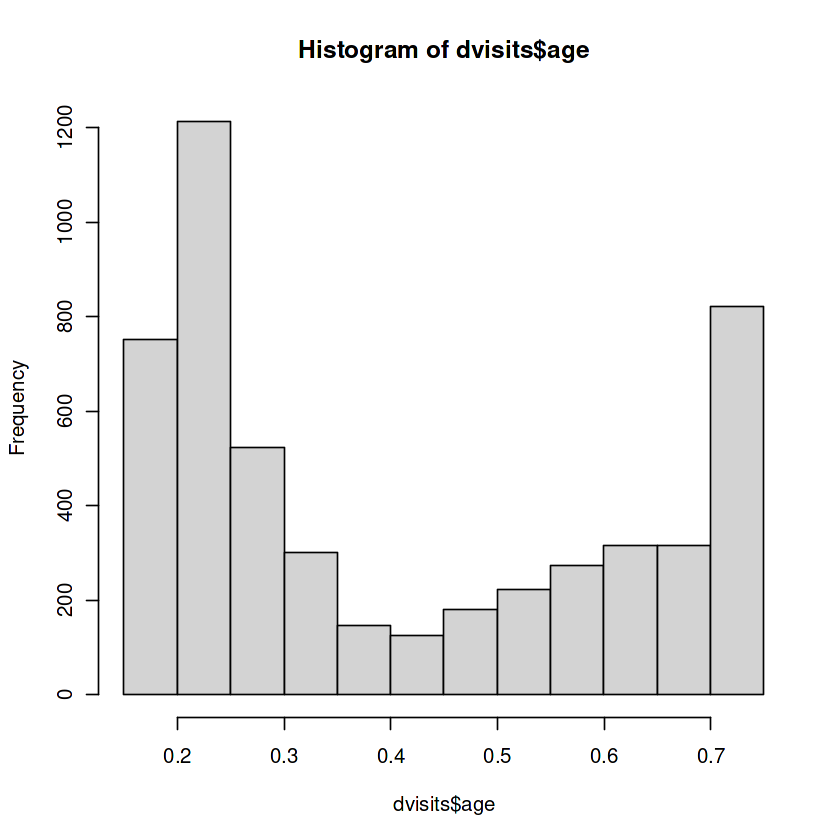

In [4]:
hist(dvisits$age) # young and old oversampled

In [5]:
# fit a poisson glm model (using the glm function with family = "poisson")
# that predicts the number of visits to the doctor (doctorco) using the following predictors: sex, agesq, income,
# levyplus, freepoor, freerepa, illness, actdays, hscore, chcond1, chcond2


poi_lin_model <- glm(doctorco ~ sex + agesq + income + levyplus + freepoor + 
               freerepa + illness + actdays + hscore + chcond1 + chcond2, 
             data = dvisits, family = "poisson")

summary(poi_lin_model)
# NULL DEVIANCE AND RESIDUAL DEVIANCE ARE MEASURES TO SEE GOODNESS OF FIT.
#LA NULL DEVIANCE è UN MODELLO BASELINE CHE INCLUDE SOLO LA INTERCEPT E SCARTA TUTTE LE COVARIATE. (PRATICAMENTE AVRESTI SOLO L'INTERCETTA) E CON QUESTO MODELLO I TUOI DATI SAREBBERO SPIEGATI DALLA MEDIA DELLA Y.
# SE LA DEVIANCE è ALTA ALLORA IL TUO MODELLO FITTA MALE
#LA RESIDUAL DEVIANCE è INVECE RELATIVA AL MIO MODELLO CORRENTE. SE è MINORE DELLA NULL DEVIANCE ALLORA LE TUE COVARIATE SPIEGANO MEGLIO LA RESPONSE VARIABLE
#CON TROPPI POCHI GRADI DI LIBERTà SEI AD ALTO RISCHIO OVERFITTING, ESTREMIZZANDO AVRESTI UNA COVARIATA PER OGNI OSSERVAZIONE IE DEG OF FREEDOM =0



#LA STATISTICAL SIGNIFICANCE DELLE COVARIATES è SIA MODEL CHE DATA DEPENDENT


Call:
glm(formula = doctorco ~ sex + agesq + income + levyplus + freepoor + 
    freerepa + illness + actdays + hscore + chcond1 + chcond2, 
    family = "poisson", data = dvisits)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.049421   0.092561 -22.141  < 2e-16 ***
sex          0.156937   0.056136   2.796  0.00518 ** 
agesq        0.273305   0.178656   1.530  0.12607    
income      -0.183643   0.086068  -2.134  0.03287 *  
levyplus     0.131355   0.071239   1.844  0.06520 .  
freepoor    -0.439279   0.179806  -2.443  0.01456 *  
freerepa     0.092966   0.091421   1.017  0.30920    
illness      0.186163   0.018280  10.184  < 2e-16 ***
actdays      0.126746   0.005034  25.179  < 2e-16 ***
hscore       0.030720   0.010084   3.046  0.00232 ** 
chcond1      0.120762   0.066370   1.820  0.06883 .  
chcond2      0.155516   0.082027   1.896  0.05797 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson

In [6]:
########## model selection

mod_sel<-stepAIC(poi_lin_model, trace = 0) # using AIC 
summary(mod_sel)

# mod_sel_BIC<-stepAIC(poi_lin_model, k = log(nrow(dvisits))) # using BIC, alternatively

# use result to interpret the coefs. and conclude what kind of person tends to go to the doctor more
#INTERPRETAZIONE: I MASCHI (SE SEX DI MASCHIO è CODIFICATO CON 1) SONO E^0.163 PIU' SOGGETTI AD ANDARE DAL DOTTORE
# SE L'INCOME AUMENTA DI UNA UNITà, ALLORA LE VISITE AL DOTTORE CALANO DEL E^-0.196, QUINDI PIU' RICCO SEI MENO VAI DAL DOTTORE
#Conclusion: What Kind of Person Tends to Visit the Doctor More?
#A person more likely to visit the doctor would be:#

#Male.
#Older (as indicated by the quadratic term agesq).
#Lower income or not in the freepoor group.
#With more reported illnesses.
#With more active days (possibly reflecting an active lifestyle or sports-related issues).
#Having chronic conditions.


Call:
glm(formula = doctorco ~ sex + agesq + income + levyplus + freepoor + 
    illness + actdays + hscore + chcond1 + chcond2, family = "poisson", 
    data = dvisits)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.025229   0.089116 -22.726  < 2e-16 ***
sex          0.163152   0.055819   2.923  0.00347 ** 
agesq        0.362996   0.155153   2.340  0.01930 *  
income      -0.195989   0.085159  -2.301  0.02137 *  
levyplus     0.083971   0.053541   1.568  0.11680    
freepoor    -0.474330   0.176313  -2.690  0.00714 ** 
illness      0.186040   0.018278  10.178  < 2e-16 ***
actdays      0.126652   0.005032  25.169  < 2e-16 ***
hscore       0.031254   0.010073   3.103  0.00192 ** 
chcond1      0.125705   0.066166   1.900  0.05745 .  
chcond2      0.165942   0.081381   2.039  0.04144 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 5634.8  on 5189  degre

In [9]:
# deviance of the model:
deviance(mod_sel)
summary(mod_sel)$deviance
# through explicit definition: 
non_zero_ys <- dvisits$doctorco[dvisits$doctorco!=0]
-2*( logLik(mod_sel)[1] - sum(- non_zero_ys + non_zero_ys*log(non_zero_ys) - log(factorial(non_zero_ys))) )

[1] 4381.662

[1] 4381.662

[1] 4381.662

In [24]:
# degrees of freedom of the model:
length(mod_sel$coefficients)

[1] 11

In [25]:
# checking goodness-of-fit: we compute the critical value
qchisq(0.95,mod_sel$df.residual) # chi-square quantile I PARAMETRI SONO CHISQ(1-ALPHA, DEGREES OF FREEDOM), TI RITORNA IL CRITICAL VALUE
#A COSA MI SERVE QUELLA CHI SQUARED? per comparare LA RESIDUAL DEVIANCE<= CHISQ ALLORA IL TUO MODELLO FITTA BENE CON SIGNIFICANZA DEL 5 PERCENTO

# notice that mod_sel$df.residual = nrow(dvisits) - length(mod_sel$coefficients)

#-----------------------------------------------------------------------------------------------------------------------------------------------------
# does the model fit the data well ???  check whether D > chi_sq quantile and if so, H0 (model fits the data well) is rejected

#NEL NOSTRO CASO IL MODELLO SELEZIONATO SALLA STEPAIC FITTA BENE DATO CHE LA SUA DEVIANCE  è 4381 <= 5347, OVVERO ACCETTIAMO LA NULL HYP

[1] 5347.533

In [26]:
# check for overdispersion

disp_poi_lin_model <- glm(mod_sel$formula, 
             data = dvisits, family = "quasipoisson")

summary(disp_poi_lin_model) # estimate of the dispersion parameter suggests there is no over/under-dispersion in our data


Call:
glm(formula = mod_sel$formula, family = "quasipoisson", data = dvisits)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.025229   0.102600 -19.739  < 2e-16 ***
sex          0.163152   0.064264   2.539  0.01115 *  
agesq        0.362996   0.178628   2.032  0.04219 *  
income      -0.195989   0.098044  -1.999  0.04566 *  
levyplus     0.083971   0.061642   1.362  0.17318    
freepoor    -0.474330   0.202990  -2.337  0.01949 *  
illness      0.186040   0.021044   8.841  < 2e-16 ***
actdays      0.126652   0.005793  21.861  < 2e-16 ***
hscore       0.031254   0.011598   2.695  0.00707 ** 
chcond1      0.125705   0.076178   1.650  0.09897 .  
chcond2      0.165942   0.093694   1.771  0.07660 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1.325508)

    Null deviance: 5634.8  on 5189  degrees of freedom
Residual deviance: 4381.7  on 5179  degrees of freedom
AIC: NA

Nu

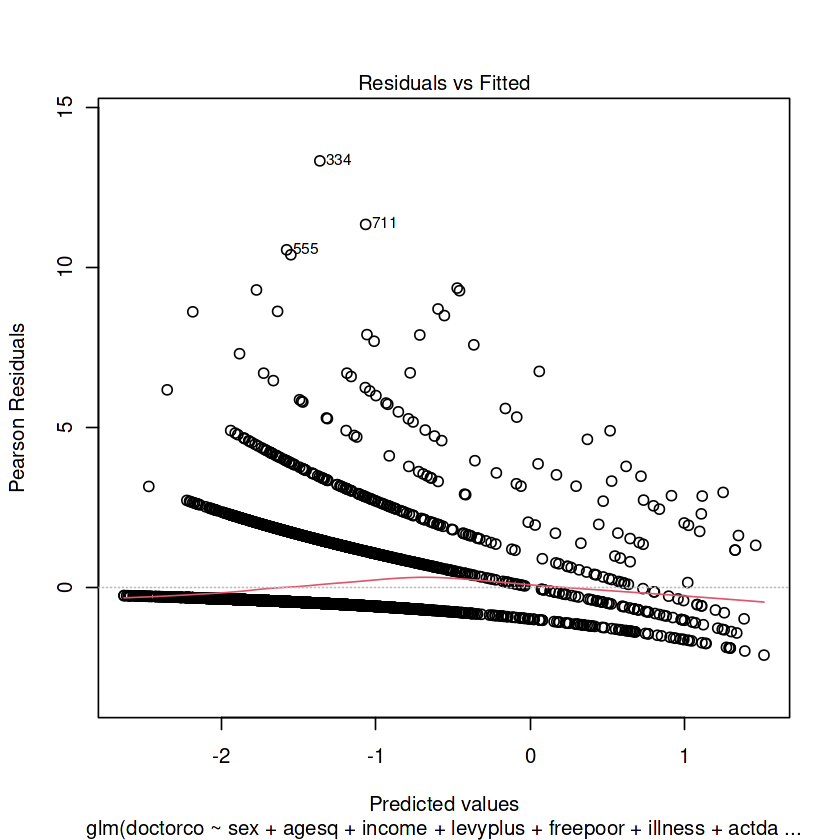

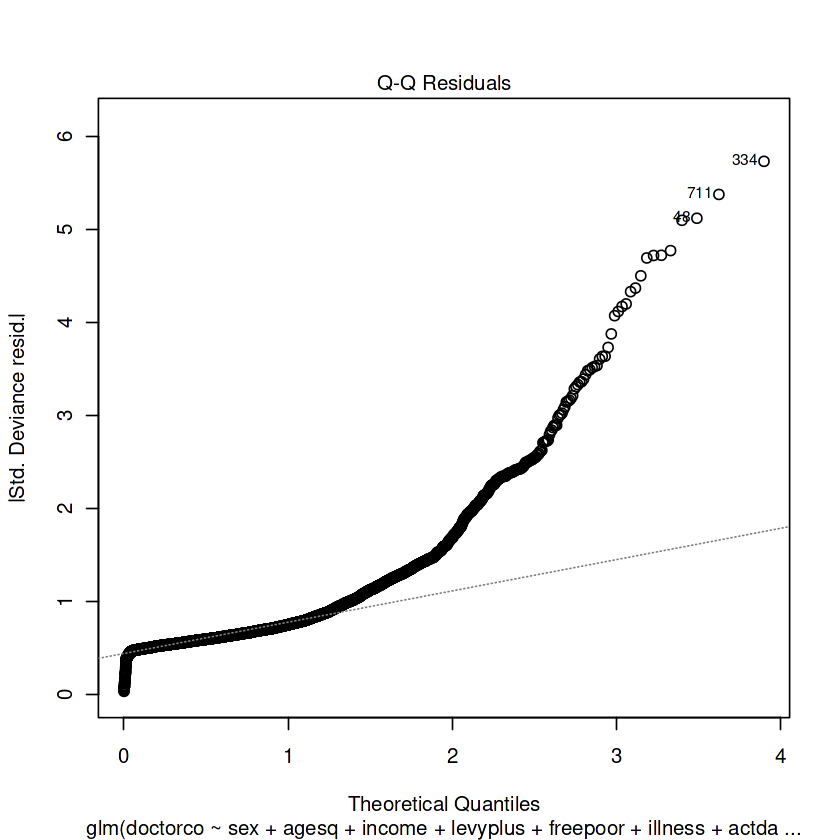

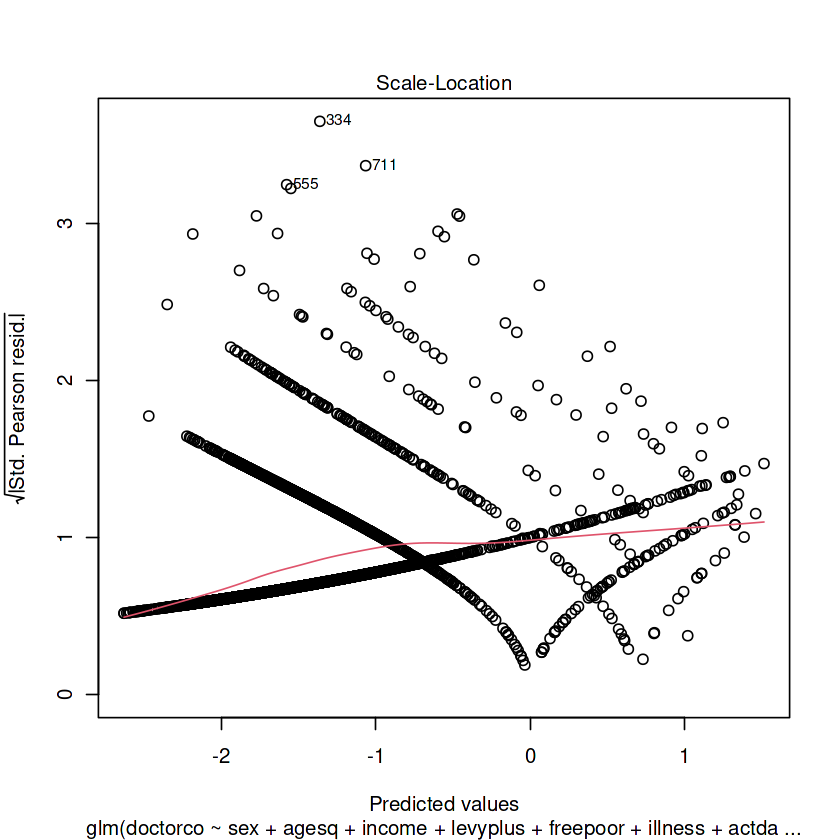

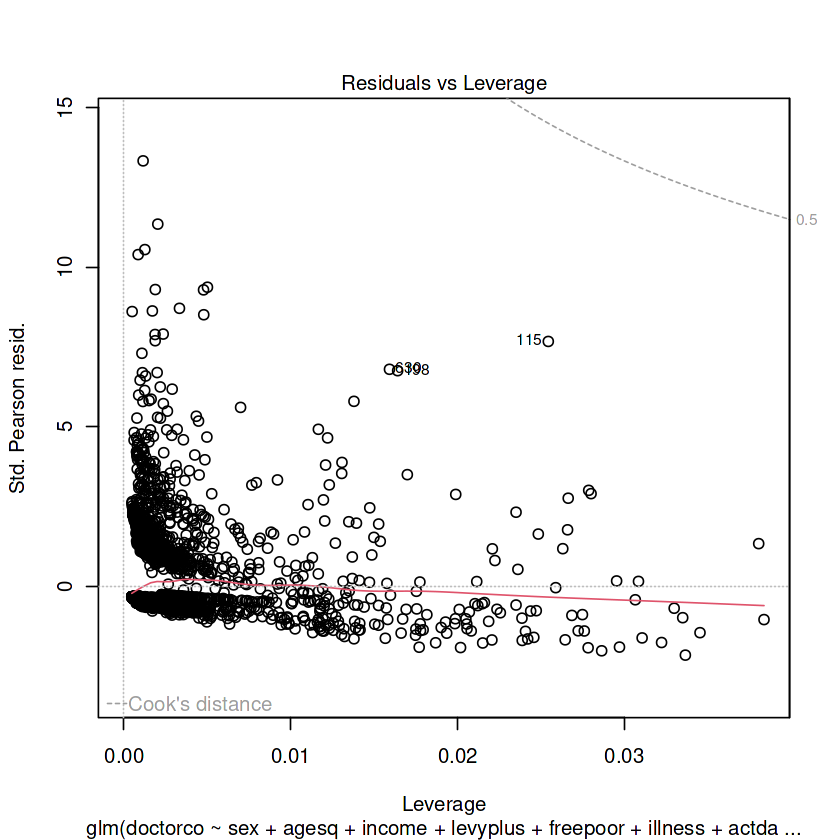

In [11]:
##### model diagnostics
plot(mod_sel)

# DISCLAIMER: contrary to the linear regression case, in GLM there's more than one way to compute residuals: Section 6.4 of the Faraway book gives the defintion
# of the two types of residuals mentioned below.

# FIRST PLOT: Pearson residuals VS predicted values (aka values of the linear predictor with beta equal to the estimated beta): The fact that the points lie
# along curved lines is a result of the discrete nature of the Y_is (being counts). The red line is obtained by smoothing these points and the fact that it is nicely
# horizontal at 0, suggests that there is no residual pattern that is not accounted for by the included covariates.

# SECOND PLOT:  supposedly checks if the standardized deviance residuals are approximately normally distributed (by comparing quantiles) but not a very precise criteria according to 
# which one can evaluate if the original distributional asssumption might not be appropriate: it turn out that you can simulate data according to poisson,
# fit a poisson regression and this qq-plot might still end up suggesting that the deviance residuals are not normally distirbuted even though the poisson assumption is 
# correct by design... YOU MAY DISREGARD THIS ONE

# THIRD PLOT: Standardized Pearson residuals VS predicted values: consider that the sqrt(Standardized Pearson residuals) essentially estimates the dispersion in the model
# now all those points that lie along those curved lines are a result of the discrete nature of the target variable (same as in the first plot). The important part
# to look at is the resulting red line obtained by smoothing all the points. This line being roughly horizontal around one is consistent with the assumption of phi = 1
# (no over/under- dispersion) coherent with what we conlcuded by fitting the quasi-poisson glm

# the last plot is a little different than the previous ones: while the first three regard model assumptions, the following one focuses on unusual points (observations):
# FOURTH PLOT: Standardized Pearson residuals VS Leverage: leverage measures how much an observation influences the model fit (it has to do with the hat matrix that we mentioned once before...)
# on such a plot one can identify outlier observations (to be further investigated), roughly characterized by high leverage and unusually high residuals.
# To help with this assesment contour lines for the a measure that capture this aspect(the Cook distance) are included as dashed. Any observation beyond the 0.5 or 1 value line for
# the cook distance would be worth investigating. In this case, there seems to be no unusual observations that require further investigation.

In [17]:
############ predict distribution of number of doctor visits for last person
# Get the last row from the dataset
last_person <- dvisits[nrow(dvisits), ]

# Check last person features
last_person # very healthy old man
last_person[["doctorco"]]

,sex,age,agesq,income,levyplus,freepoor,freerepa,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5190,0,0.72,0.5184,0.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


[1] 0

In [18]:
# Predict the rate of doctor visits (lambda) for the last person
predicted_rate <- predict(mod_sel, newdata = last_person, type = "response") 
# "response" returns the estimated lambda_s (mean of the poisson) given the estimated betas obtained by fitting the model
print(predicted_rate)
# Calculate probabilities for 0, 1, 2, ..., max_visits doctor visits
max_visits <- max(dvisits$doctorco)
probabilities <- dpois(0:max_visits, lambda = predicted_rate) # computing the probabilities according to the poisson density for theestimated lambda

# Print the results
cbind(c(0:max_visits),c(probabilities))

     5190 
0.1516699 


0,8.592718e-01
1,1.303257e-01
2,9.883247e-03
3,4.996639e-04
4,1.894600e-05
5,5.747077e-07
6,1.452765e-08
7,3.147725e-10
8,5.967692e-12
9,1.005688e-13


In [30]:
mod_sel$formula

doctorco ~ sex + agesq + income + levyplus + freepoor + illness + 
    actdays + hscore + chcond1 + chcond2


Family: poisson 
Link function: log 

Formula:
doctorco ~ sex + s(age) + s(income) + levyplus + freepoor + illness + 
    s(actdays) + s(hscore) + chcond1 + chcond2

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.89516    0.06448 -29.392  < 2e-16 ***
sex          0.15257    0.05610   2.719  0.00654 ** 
levyplus     0.04952    0.05394   0.918  0.35863    
freepoor    -0.53571    0.17749  -3.018  0.00254 ** 
illness      0.13730    0.01915   7.171 7.44e-13 ***
chcond1      0.12328    0.06625   1.861  0.06275 .  
chcond2      0.16289    0.08086   2.014  0.04396 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df Chi.sq  p-value    
s(age)     1.000  1.001  14.88 0.000114 ***
s(income)  2.114  2.655  10.81 0.010760 *  
s(actdays) 5.517  6.555 813.39  < 2e-16 ***
s(hscore)  2.962  3.667  16.00 0.003406 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

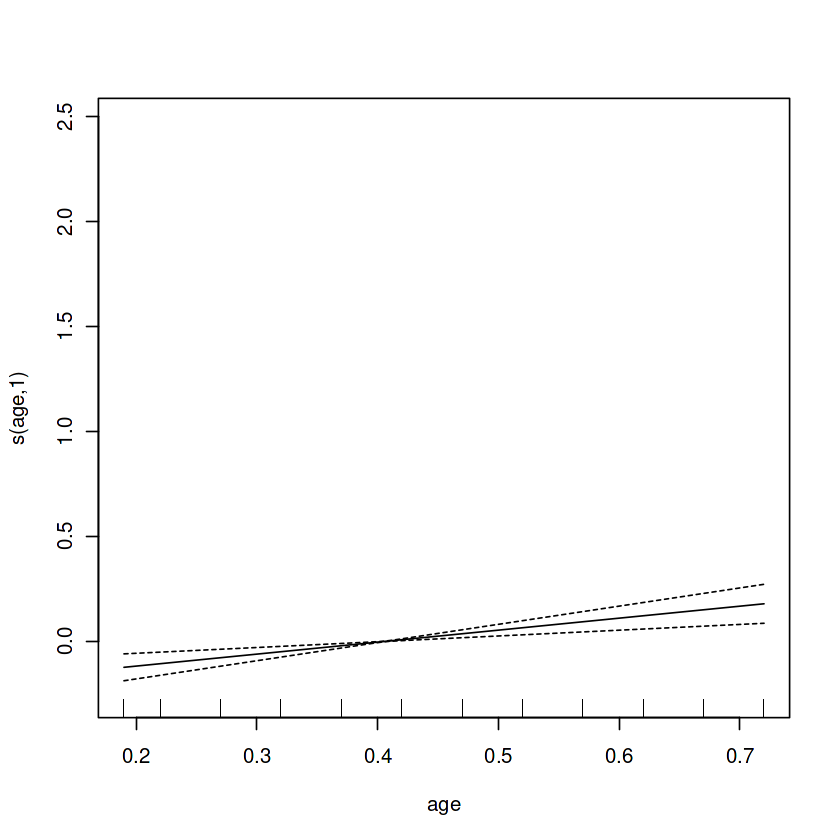

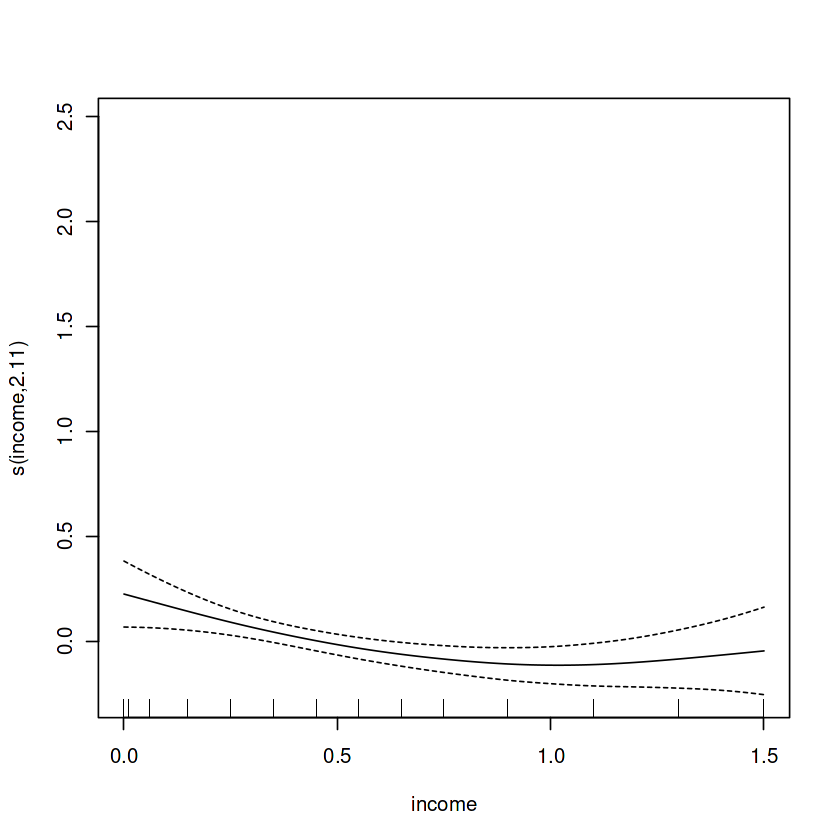

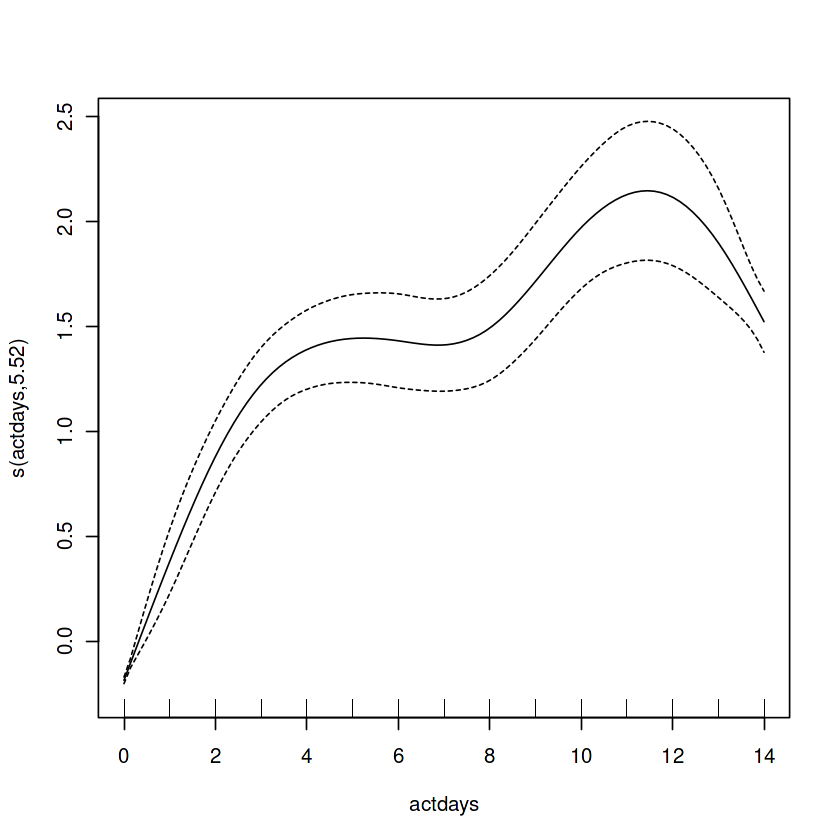

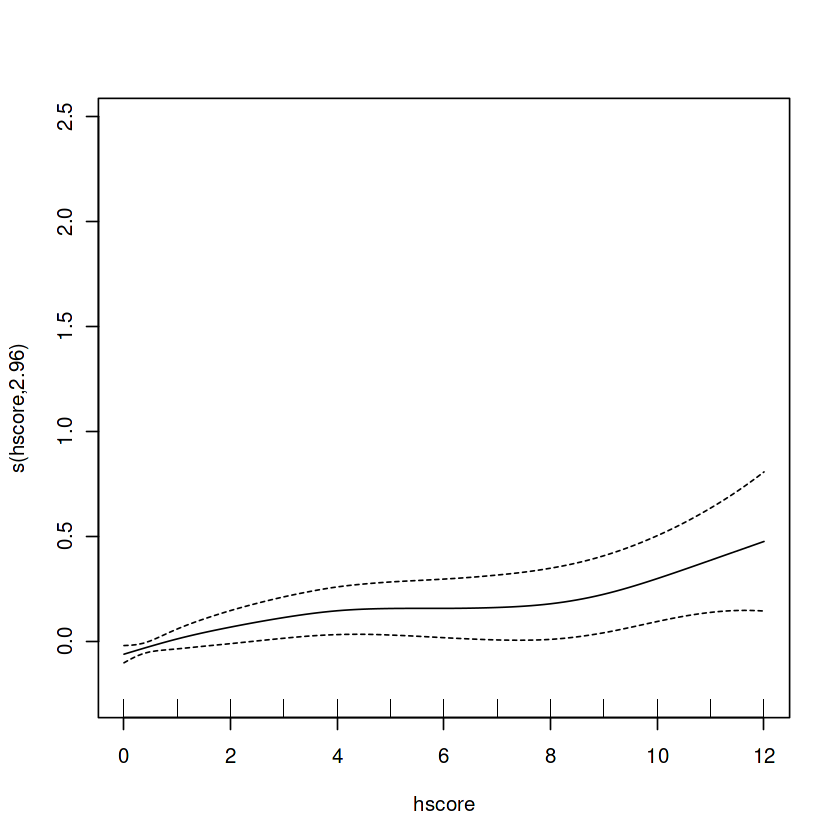

In [19]:
# gam comparison: I include the same predictors that were selected with AIC in the poisson regression case and 
#allow for smooth non-linear effects for some of them

poi_add_model <- gam(doctorco ~ sex +  s(age) + s(income) + levyplus + freepoor 
                     + illness + s(actdays) + s(hscore) + chcond1 + chcond2, family = "poisson", 
             data = dvisits)
#In many real-world situations, the effect of a predictor on the outcome may not be linear. For example:
#The effect of age on doctor visits might increase during early life, plateau during middle age, and rise again in older age.

summary(poi_add_model)
plot(poi_add_model) # plots the estimated smooth effects with a common y-axis range 
# (useful to see that actdays has a greater impact than age for instance)

In [32]:
# comparison with poisson linear model
AIC(mod_sel, poi_add_model)
# the additive one is to be preferred (lower AIC)

,df,AIC
,<dbl>,<dbl>
mod_sel,11.00000,6807.329
poi_add_model,18.59258,6653.075
